# Sales Prediction using python!! 💸

## Problem :
Predicting the future sales using machine learning to manipulate the cost of advertising the product of a business.
The goal of this project is to check how much of the product people will actually buy based on the factors like the amount that is being spent for advertising the product, the segment of people this advertisement is for and the kind of platform it is being done on.

## Data :
The dataset has been taken from kaggle -

https://www.kaggle.com/datasets/bumba5341/advertisingcsv


## Model Building :
Since this is a regression problem, we will be using Random Forest Regressor as our baseline model.

## Evaluation metrics :
The default evaluation metric for regression problems is R2(coefficient of determination). Apart from this we will be using other evaluation metrics like MSE(mean squared error), MAE(mean absolute error), MAPE(mean absolute percentage error).

## Preparing the tools required 

In [31]:
#import all the EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modelling libraries 
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
#load the data 
df = pd.read_csv("C:\\Users\\aryas\\OneDrive\\Desktop\\advertising.csv",index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
len(df)

200

In [6]:
#check the dtypes
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [7]:
#check for missing values
df.isna().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

#### There are no missing values, and are already in a numerical format so we can start the EDA of this dataset.

## EDA (exploratory data analysis)

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


C:\Users\aryas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


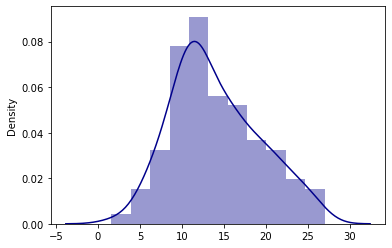

In [9]:
#visualizing the target column
sns.distplot(x=df["Sales"],kde= True, color= "darkblue")
plt.show()

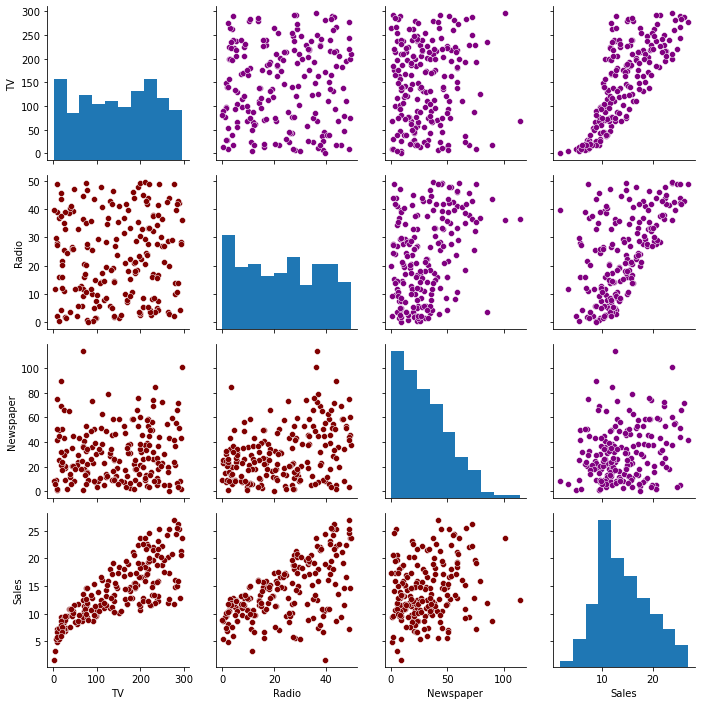

In [10]:
#visualizing all the features present in the car dataset
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot,color='purple')
g.map_lower(sns.scatterplot, color='maroon')
g.map_diag(plt.hist);

In [11]:
df.value_counts()

TV     Radio  Newspaper  Sales
0.7    39.6   8.7        1.6      1
206.9  8.4    26.4       12.9     1
197.6  3.5    5.9        11.7     1
       23.3   14.2       16.6     1
198.9  49.4   60.0       23.7     1
                                 ..
97.5   7.6    7.2        9.7      1
100.4  9.6    3.6        10.7     1
102.7  29.6   8.4        14.0     1
104.6  5.7    34.4       10.4     1
296.4  36.3   100.9      23.8     1
Length: 200, dtype: int64

In [12]:
#comparing the TV column to the target column
pd.crosstab(df["TV"],df["Sales"])

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
TV,,,,,,,,,,,,,,,,,,,,,
0.7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
290.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


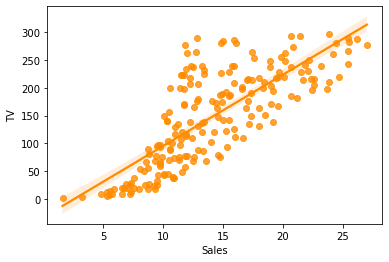

In [13]:
sns.regplot(x= df["Sales"], y= df["TV"], color= "darkorange");

In [14]:
#comparing the radio column with the target variable
pd.crosstab(df["Radio"], df["Sales"])

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
Radio,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


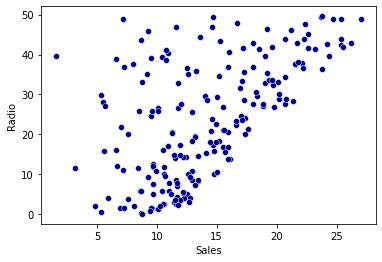

In [15]:
sns.scatterplot(x= df["Sales"], y=df["Radio"], color = "darkblue");

In [16]:
#comparing the Newspaper column with the target variable
pd.crosstab(df["Newspaper"], df["Sales"])

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
Newspaper,,,,,,,,,,,,,,,,,,,,,
0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


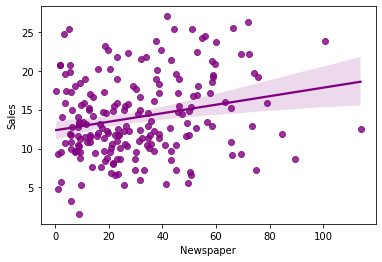

In [17]:
sns.regplot(data=df, x="Newspaper",y="Sales", color = "purple");

In [64]:
#correlation matrix
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


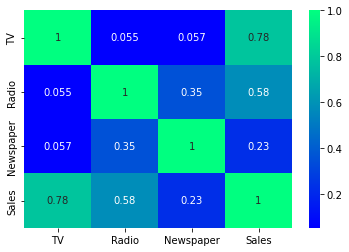

In [72]:
#visual representation of the matrix using a heatmap
sns.heatmap(data = df.corr(),annot= True, cmap= "winter");

## Modelling

In [18]:
#split the data into feature and target variables
x = df.drop("Sales", axis =1)
y = df["Sales"]

In [19]:
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [20]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [21]:
#split the data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#instantiate the model
model = RandomForestRegressor()

#fit the model on the train data
model.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
#score the model on the test set
model.score(x_test, y_test)

0.9818644201438564

In [23]:
#prediction
y_preds = model.predict(x_test)

In [24]:
y_preds

array([17.772, 21.341, 20.467,  6.798, 23.031, 13.037, 22.487,  9.568,
       11.873, 15.361,  7.628,  9.195, 12.166,  4.539, 10.505, 12.545,
        6.339, 16.274, 11.369, 19.429, 20.004, 12.967, 10.33 , 22.03 ,
        9.958,  9.059, 22.311, 12.85 , 10.307,  5.11 , 11.537, 10.954,
       22.048,  8.402, 15.227, 20.377, 12.176, 20.77 , 12.377,  7.639])

In [26]:
mae = mean_absolute_error(y_test, y_preds)
mae

0.6322749999999987

In [28]:
mse = mean_squared_error(y_test, y_preds)
mse

0.572424075

In [30]:
mape = mean_absolute_percentage_error(y_test, y_preds)
mape

0.05589795840465463

### Linear regression model

In [34]:
#setup the random seed
np.random.seed(42)
#instantiate the model
linr_reg = LinearRegression()

#fit the train data
linr_reg.fit(x_train, y_train)

#score on the test data
linr_reg.score(x_test, y_test)

0.8994380241009121

In [36]:
#prediction 
y_preds_1 = linr_reg.predict(x_test)
y_preds_1

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [43]:
mae1 = mean_absolute_error(y_test, y_preds_1)
mae

1.46075671681176

In [44]:
mse1 = mean_squared_error(y_test, y_preds_1)
mse

3.1740973539761024

In [46]:
mape1 = mean_absolute_percentage_error(y_test, y_preds_1)
mape1

0.1519884660283122

In [53]:
y_preds

array([17.772, 21.341, 20.467,  6.798, 23.031, 13.037, 22.487,  9.568,
       11.873, 15.361,  7.628,  9.195, 12.166,  4.539, 10.505, 12.545,
        6.339, 16.274, 11.369, 19.429, 20.004, 12.967, 10.33 , 22.03 ,
        9.958,  9.059, 22.311, 12.85 , 10.307,  5.11 , 11.537, 10.954,
       22.048,  8.402, 15.227, 20.377, 12.176, 20.77 , 12.377,  7.639])

In [54]:
y_preds_1

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

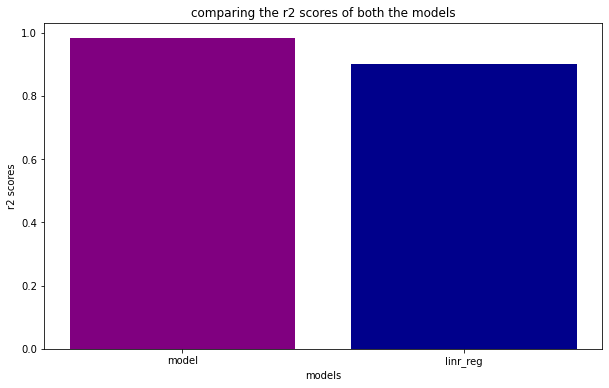

In [62]:
#comparing the R2 score of both the models 
plt.figure(figsize = (10,6))
#R2 scores
r2_scores = [r2_score(y_test,y_preds), r2_score(y_test,y_preds_1)]
#models
models = ["model", "linr_reg"]

#plot the data
plt.bar(models, r2_scores, color = ["purple","darkblue"])
plt.title("comparing the r2 scores of both the models")
plt.xlabel("models")
plt.ylabel("r2 scores")
plt.show()